Ashley Patron, ASTR 4750
## Project 1: Supernova Lightcurve Models

In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
#inputs:
#mass of radioactive Ni produced (g), total SN ejecta mass (g),
#initial progenitor star radius (cm), SN ejecta velocity (cm/s)
M_Ni = 0.4*(1.99e33) #(solar masses to g)
M_ej = 10*(1.99e33)
R_0 = 1e13
v = 9000e5 #(km to cm)

In [3]:
#speed of light (cm/s), integration constant, opacity (cm^2/g)
c = 3e10
beta = 13.7 
kappa = 0.2

#specific energies due to radioactive decay (erg*g/s)
E_Ni = 3.9e10 
E_Co = 6.8e9 

#characteristic half-life time scales (days)
t_Ni = 113*(24*3600) 
t_Co = 8.8*(24*3600)

#diffusion time-scale for radiation to escape SN ejecta
t_d = np.sqrt((10/3)*(M_ej/v)*(kappa/(beta*c)))

In [4]:
#first and second integrals in equation
def integrand1(t, t_d):
    return (R_0/(v*t_d) + (t/t_d))*np.exp((t/t_d)**2 + (2*R_0*t)/(v*t_d**2))*np.exp(-t/t_Ni)
    
def integrand2(t, t_d):
    return (R_0/(v*t_d) + (t/t_d))*np.exp((t/t_d)**2 + (2*R_0*t)/(v*t_d**2))*np.exp(-t/t_Co)

#define both integrals
def integral1(t_prev, t_i, t_d):
    return quad(integrand1, t_prev, t_i, args=(t_d))[0]

def integral2(t_prev, t_i, t_d):
    return quad(integrand2, t_prev, t_i, args=(t_d))[0]

In [5]:
#times
t_max = 300 #days
t = np.linspace(0, t_max, t_max)*(3600*24)

I1 = np.zeros(np.shape(t))
I2 = np.zeros(np.shape(t))

for i in range(1,t_max):
    I1[i] = integral1(t[i-1], t[i], t_d) + I1[i-1]
    I2[i] = integral2(t[i-1], t[i], t_d) + I2[i-1]

In [35]:
#common factor (name it K)
K = (2*M_Ni)/(t_d)*np.exp(-((t**2/t_d**2)+(2*R_0*t)/(v*t_d**2)))

#compute luminosity (erg/s) 
L_t = K*((E_Ni - E_Co)*I1 + E_Co*I2)

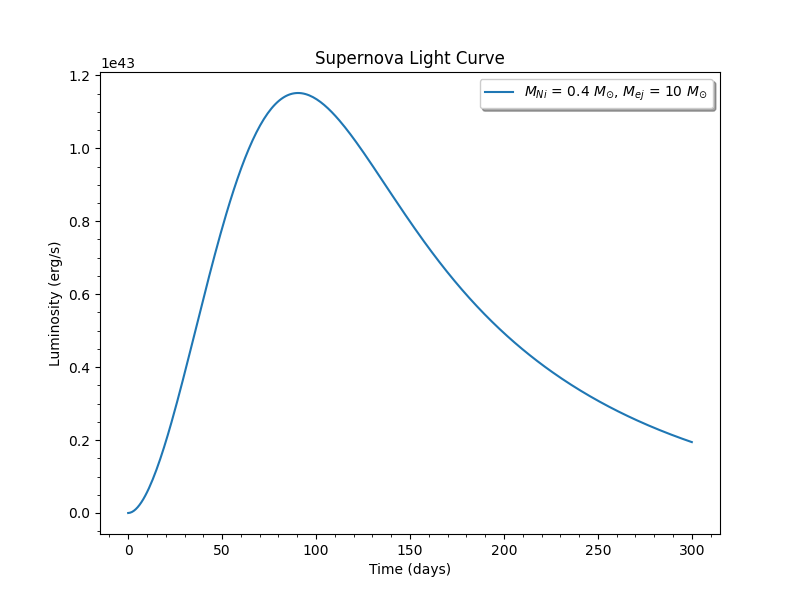

In [7]:
plt.figure(figsize=(8,6))
plt.title('Supernova Light Curve')
plt.plot(t/(24*3600), L_t, label='$M_{Ni}$ = 0.4 $M_{\odot}$, $M_{ej}$ = 10 $M_{\odot}$')

legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Time (days)')
plt.ylabel('Luminosity (erg/s)')
#plt.yscale('log')
plt.minorticks_on()

plt.show()

In [8]:
#compute models for lower/higher values of M_Ni and M_ej
M_Ni_low = M_Ni - 0.2*(1.99e33)
M_Ni_high = M_Ni + 0.2*(1.99e33)
M_ej_low = M_ej - 3*(1.99e33)
M_ej_high = M_ej + 3*(1.99e33)

t_d_lowMej = np.sqrt((10/3)*(M_ej_low/v)*(kappa/(beta*c)))
t_d_highMej = np.sqrt((10/3)*(M_ej_high/v)*(kappa/(beta*c)))

In [9]:
#low M_Ni
I3 = np.zeros(np.shape(t))
I4 = np.zeros(np.shape(t))
#high M_Ni
I5 = np.zeros(np.shape(t))
I6 = np.zeros(np.shape(t))

#low M_ej
I7 = np.zeros(np.shape(t))
I8 = np.zeros(np.shape(t))
#high M_ej
I9 = np.zeros(np.shape(t))
I10 = np.zeros(np.shape(t))

#integrals for low and high M_Ni, same M_ej
#not dependent on M_Ni, so these integrals are the same as original
I3 = I1
I4 = I2
I5 = I1
I6 = I2

#integrals for same M_Ni, low and high M_ej
#dependent on M_ej in calculation of t_d, so integrals are different
for i in range(1,t_max):
    I7[i] = integral1(t[i-1], t[i], t_d_lowMej) + I7[i-1]
    I8[i] = integral2(t[i-1], t[i], t_d_lowMej) + I8[i-1]
    I9[i] = integral1(t[i-1], t[i], t_d_highMej) + I9[i-1]
    I10[i] = integral2(t[i-1], t[i], t_d_highMej) + I10[i-1]

In [10]:
#common factor for low and high M_Ni #same t_d bc same M_ej
K_lowMNi = (2*M_Ni_low)/(t_d)*np.exp(-((t**2/t_d**2)+(2*R_0*t)/(v*t_d**2)))
K_highMNi = (2*M_Ni_high)/(t_d)*np.exp(-((t**2/t_d**2)+(2*R_0*t)/(v*t_d**2)))

#common factor for low and high M_ej #different t_d but same M_Ni
K_lowMej = (2*M_Ni)/(t_d_lowMej)*np.exp(-((t**2/t_d_lowMej**2)+(2*R_0*t)/(v*t_d_lowMej**2)))
K_highMej = (2*M_Ni)/(t_d_highMej)*np.exp(-((t**2/t_d_highMej**2)+(2*R_0*t)/(v*t_d_highMej**2)))

#compute luminosities (erg/s) 
L_lowMNi = K_lowMNi*((E_Ni - E_Co)*I3 + E_Co*I4)
L_highMNi = K_highMNi*((E_Ni - E_Co)*I5 + E_Co*I6)
L_lowMej = K_lowMej*((E_Ni - E_Co)*I7 + E_Co*I8)
L_highMej = K_highMej*((E_Ni - E_Co)*I9 + E_Co*I10)

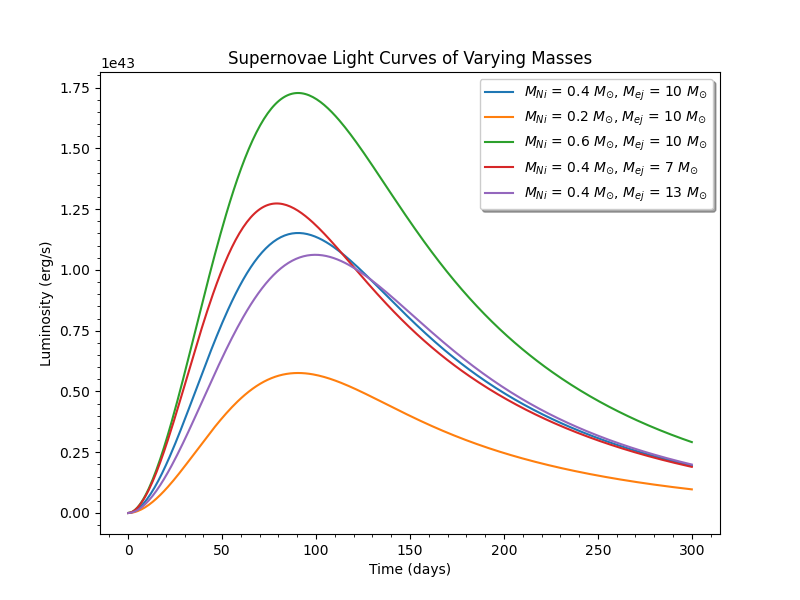

In [11]:
plt.figure(figsize=(8,6))
plt.title('Supernovae Light Curves of Varying Masses')

plt.plot(t/(24*3600), L_t, label='$M_{Ni}$ = 0.4 $M_{\odot}$, $M_{ej}$ = 10 $M_{\odot}$')
plt.plot(t/(24*3600), L_lowMNi, label ='$M_{Ni}$ = 0.2 $M_{\odot}$, $M_{ej}$ = 10 $M_{\odot}$')
plt.plot(t/(24*3600), L_highMNi, label='$M_{Ni}$ = 0.6 $M_{\odot}$, $M_{ej}$ = 10 $M_{\odot}$')
plt.plot(t/(24*3600), L_lowMej, label='$M_{Ni}$ = 0.4 $M_{\odot}$, $M_{ej}$ = 7 $M_{\odot}$')
plt.plot(t/(24*3600), L_highMej, label='$M_{Ni}$ = 0.4 $M_{\odot}$, $M_{ej}$ = 13 $M_{\odot}$')

legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Time (days)')
plt.ylabel('Luminosity (erg/s)')
#plt.yscale('log')
plt.minorticks_on()

plt.show()

In [12]:
#compute with R_0 = 0
R0 = 0

I11 = np.zeros(np.shape(t))
I12 = np.zeros(np.shape(t))

for i in range(1,t_max):
    I11[i] = integral1(t[i-1], t[i], t_d) + I11[i-1]
    I12[i] = integral2(t[i-1], t[i], t_d) + I12[i-1]

In [13]:
#common factor
K_R0 = (2*M_Ni)/(t_d)*np.exp(-((t**2/t_d**2)+(2*R0*t)/(v*t_d**2)))

#compute luminosity (erg/s) 
L_R0 = K_R0*((E_Ni - E_Co)*I11 + E_Co*I12)

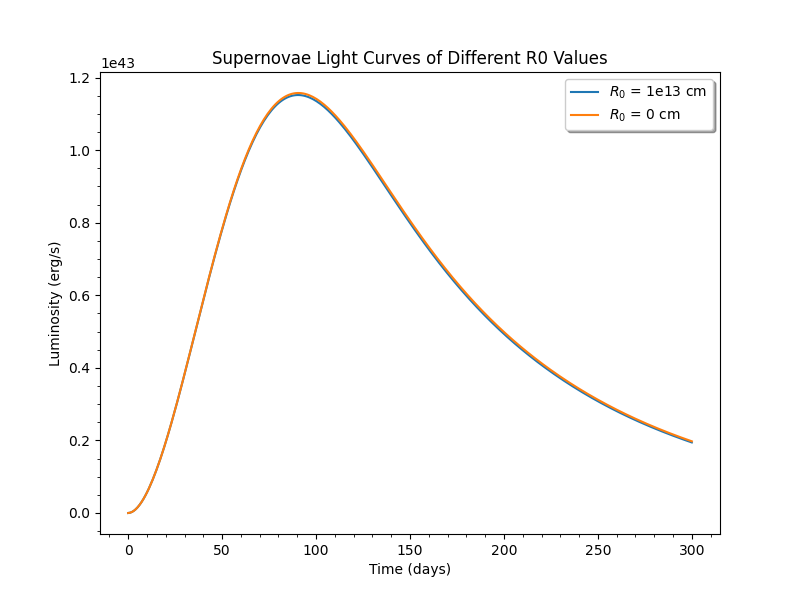

In [14]:
plt.figure(figsize=(8,6))
plt.title('Supernovae Light Curves of Different R0 Values')

plt.plot(t/(24*3600), L_t, label='$R_{0}$ = 1e13 cm')
plt.plot(t/(24*3600), L_R0, label='$R_{0}$ = 0 cm')

legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Time (days)')
plt.ylabel('Luminosity (erg/s)')
#plt.yscale('log')
plt.minorticks_on()

plt.show()

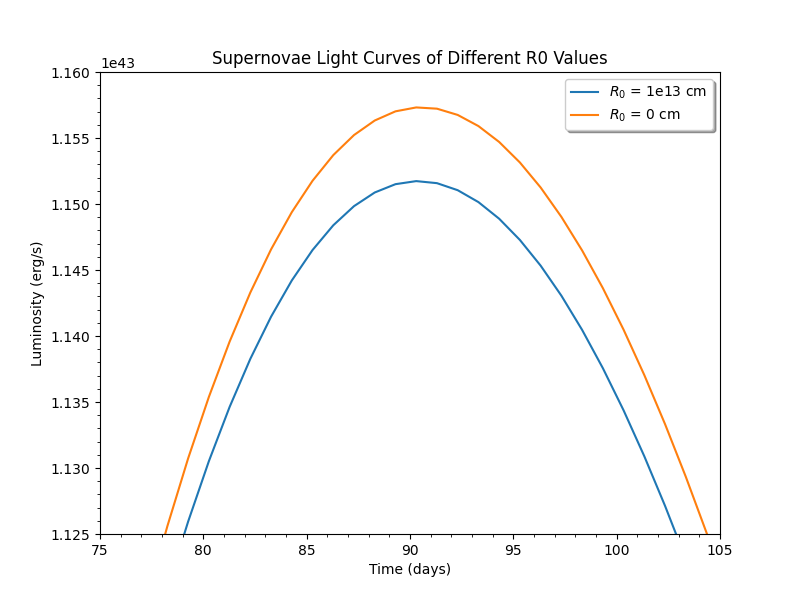

In [15]:
#zoomed-in graph
plt.figure(figsize=(8,6))
plt.title('Supernovae Light Curves of Different R0 Values')

plt.plot(t/(24*3600), L_t, label='$R_{0}$ = 1e13 cm')
plt.plot(t/(24*3600), L_R0, label='$R_{0}$ = 0 cm')

legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Time (days)')
plt.ylabel('Luminosity (erg/s)')
plt.xlim(75,105)
plt.ylim(1.125e43,1.16e43)
#plt.yscale('log')
plt.minorticks_on()

plt.show()

In [16]:
#fit exponential function for late data points after maximum light
def func(times,A,B):
    return A*np.exp(-B*times)

In [17]:
maxlight = max(L_t)
t_maxL = np.where(L_t == maxlight)[0][0] + 25

print(maxlight, t_maxL)

1.1517343065308778e+43 115


In [18]:
time = np.linspace(t_maxL, t_max, t_max-t_maxL)
late_L = L_t[t_maxL:]

In [19]:
fit,cov = curve_fit(func, time, late_L, p0=[max(L_t),1/t_Ni])
print('A = ', fit[0])
print('B = ', fit[1])

A =  3.175508251773654e+43
B =  0.00930218017713661


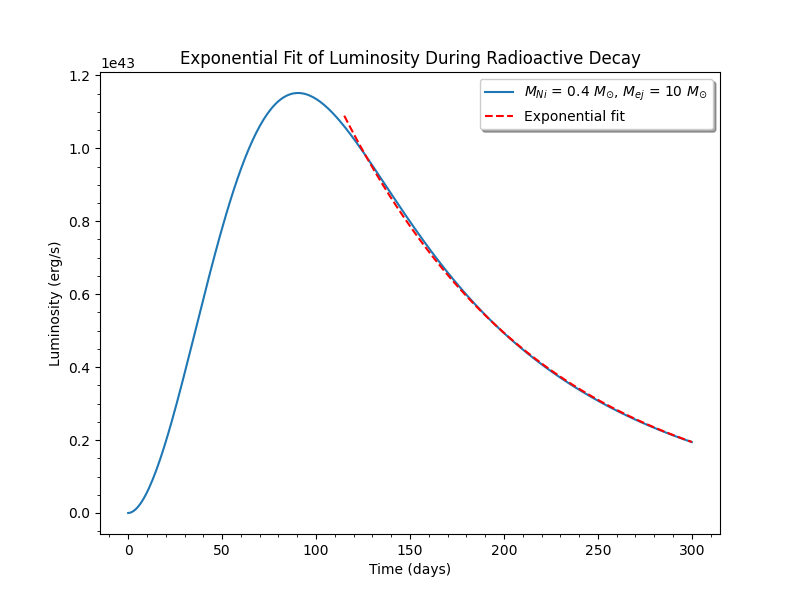

In [20]:
plt.figure(figsize=(8,6))
plt.title('Exponential Fit of Luminosity During Radioactive Decay')

plt.plot(t/(24*3600), L_t, label='$M_{Ni}$ = 0.4 $M_{\odot}$, $M_{ej}$ = 10 $M_{\odot}$')
plt.plot(time, func(time, fit[0], fit[1]), linestyle='--', color='red', label='Exponential fit')

legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Time (days)')
plt.ylabel('Luminosity (erg/s)')
#plt.yscale('log')
plt.minorticks_on()

plt.show()

In [38]:
#get luminosity curves for different values of M_ej, which affects the values of t_d and K
M_ej_lower = M_ej - 5*(1.99e33)
M_ej_higher = M_ej + 5*(1.99e33)
    
t_d_lowerMej = np.sqrt((10/3)*(M_ej_lower/v)*(kappa/(beta*c)))
t_d_higherMej = np.sqrt((10/3)*(M_ej_higher/v)*(kappa/(beta*c)))
    
K_lowerMej = (2*M_Ni)/(t_d_lowerMej)*np.exp(-((t**2/t_d_lowerMej**2)+(2*R_0*t)/(v*t_d_lowerMej**2)))
K_higherMej = (2*M_Ni)/(t_d_higherMej)*np.exp(-((t**2/t_d_higherMej**2)+(2*R_0*t)/(v*t_d_higherMej**2)))

In [39]:
#lower M_ej
I13 = np.zeros(np.shape(t))
I14 = np.zeros(np.shape(t))
#higher M_ej
I15 = np.zeros(np.shape(t))
I16 = np.zeros(np.shape(t))

for i in range(1,t_max):
    I13[i] = integral1(t[i-1], t[i], t_d_lowerMej) + I13[i-1]
    I14[i] = integral2(t[i-1], t[i], t_d_lowerMej) + I14[i-1]
    I15[i] = integral1(t[i-1], t[i], t_d_higherMej) + I15[i-1]
    I16[i] = integral2(t[i-1], t[i], t_d_higherMej) + I16[i-1]

In [40]:
L_lowerMej = K_lowerMej*((E_Ni - E_Co)*I13 + E_Co*I14)
L_higherMej = K_higherMej*((E_Ni - E_Co)*I15 + E_Co*I16)

In [44]:
#plot of peak luminosity vs. rise-time to maximum
lums = [L_lowerMej, L_lowMej, L_t, L_highMej, L_higherMej]
maxLs = []
t_maxLs = []

for lum in lums:
    maxLs.append(max(lum))
    t_maxLs.append(np.where(lum == max(lum))[0][0])

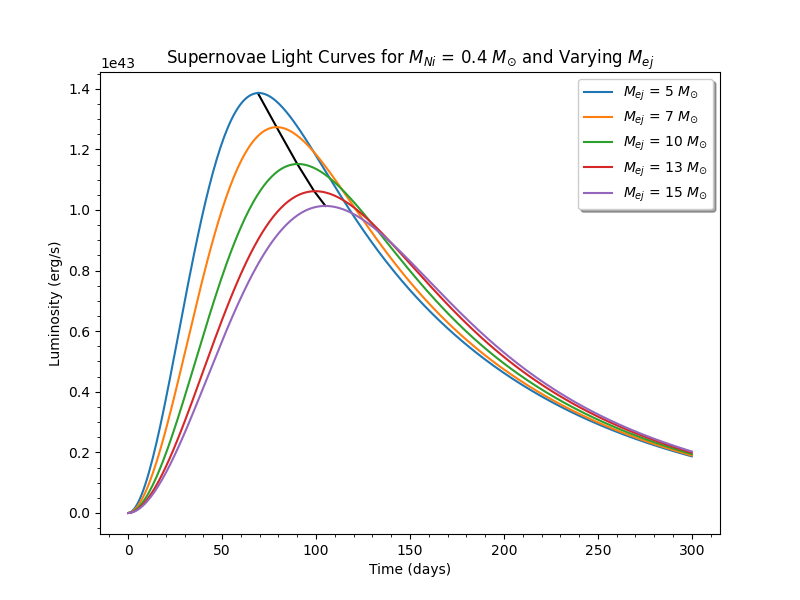

In [61]:
plt.figure(figsize=(8,6))
plt.title('Supernovae Light Curves for $M_{Ni}$ = 0.4 $M_{\odot}$ and Varying $M_{ej}$')

labels = ['$M_{ej}$ = 5 $M_{\odot}$','$M_{ej}$ = 7 $M_{\odot}$','$M_{ej}$ = 10 $M_{\odot}$',
          '$M_{ej}$ = 13 $M_{\odot}$','$M_{ej}$ = 15 $M_{\odot}$']

plt.plot(t_maxLs, maxLs, color = 'k')

for i in range(len(lums)):
    plt.plot(t/(24*3600), lums[i], label=labels[i])

legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Time (days)')
plt.ylabel('Luminosity (erg/s)')
#plt.yscale('log')
plt.minorticks_on()

plt.show()

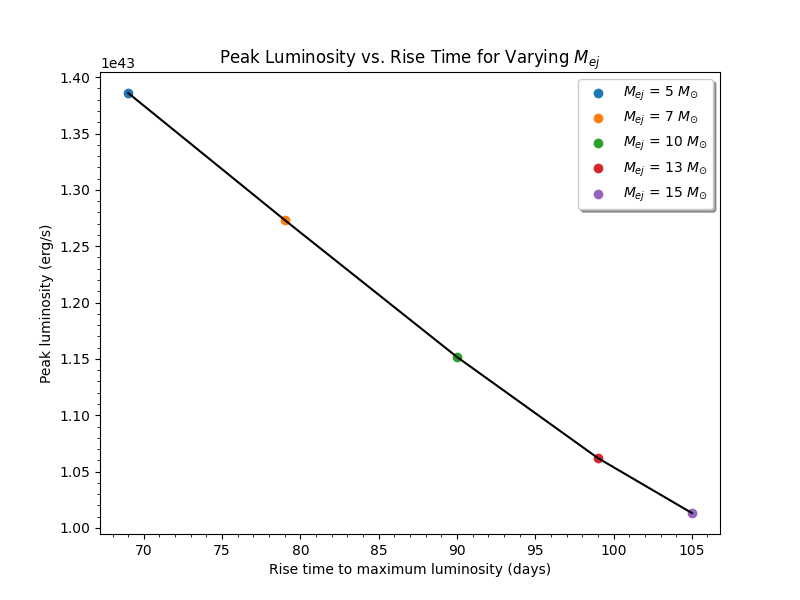

In [66]:
plt.figure(figsize=(8,6))
plt.title('Peak Luminosity vs. Rise Time for Varying $M_{ej}$')

labels = ['$M_{ej}$ = 5 $M_{\odot}$','$M_{ej}$ = 7 $M_{\odot}$','$M_{ej}$ = 10 $M_{\odot}$',
          '$M_{ej}$ = 13 $M_{\odot}$','$M_{ej}$ = 15 $M_{\odot}$']

plt.plot(t_maxLs, maxLs, color = 'k')

for i in range(len(lums)):
    plt.scatter(t_maxLs[i], maxLs[i], label=labels[i])

legend = plt.legend(loc='upper right', shadow=True)
plt.xlabel('Rise time to maximum luminosity (days)')
plt.ylabel('Peak luminosity (erg/s)')
#plt.yscale('log')
plt.minorticks_on()

plt.show()